# Project: Wrangling Austin Texas Water Quality Dataset Using Pandas and Seaborn Libraries exclusively.

- Originally performed by ***Dr. Mike Chapple*** Using ***R***. Redone by ***Clifford Aniakor*** Using ***Python***. 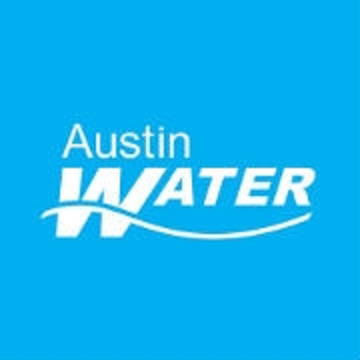

In [152]:
import pandas as pd
import seaborn as sns
%matplotlib inline


## Data Gathering
This data was collected to assess water quality conditions in the natural creeks, aquifers and lakes in the Austin area, Texas, United States.This is raw data, provided directly from the Field Sample database (FSDB) and should be considered provisional. The data may or may not have been reviewed by project staff.

#### Columns of Interest
- sample_date: Date and time of sample collection
- site_name: Place/location of water source
- site_type: Type of water source
- param_type: Classification of effluent properties
- parameter: water property measured
- unit: unit of measurement

In [153]:
#Load the dataset
water=pd.read_csv("http://594442.youcanlearnit.net/austinwater.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [154]:

water.head()

,WATERSHED,SAMPLE_DATE,SITE_NAME,SITE_TYPE,MEDIUM,PARAM_TYPE,PARAMETER,QUALIFIER,RESULT,UNIT,...,METHOD,QC_FLAG,PROJECT,Location,DATA_REF_NO,LAT_DD_WGS84,LON_DD_WGS84,SAMPLE_REF_NO,TIME_NULL,QC_TYPE
0,Barton Creek,07/18/2013 02:58:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Benthic Macroinvertebrates,ANNELIDA (WORM/LEECHES/PLANARIA),NaN,1.0,1=Present; 0=Absent,...,VISUAL ASSESSMENT,U,Barton Springs Salamander,"(30.2635848609854, -97.7680757366172)",2227594,30.263585,-97.768076,440459,False,NaN
1,Barton Creek,07/18/2013 02:58:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Benthic Macroinvertebrates,CRAYFISH (ADULT),NaN,2.0,Relative Abundance (1): <20 (2): 21-50 (3): >50,...,VISUAL ASSESSMENT,U,Barton Springs Salamander,"(30.2635848609854, -97.7680757366172)",2227586,30.263585,-97.768076,440459,False,NaN
2,Barton Creek,07/18/2013 02:58:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Benthic Macroinvertebrates,CRAYFISH (JUVENILE),NaN,1.0,Relative Abundance (1): <20 (2): 21-50 (3): >50,...,VISUAL ASSESSMENT,U,Barton Springs Salamander,"(30.2635848609854, -97.7680757366172)",2227585,30.263585,-97.768076,440459,False,NaN
3,Barton Creek,07/18/2013 02:58:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Benthic Macroinvertebrates,DIPTERA (MIDGE/FLY),NaN,1.0,1=Present; 0=Absent,...,VISUAL ASSESSMENT,U,Barton Springs Salamander,"(30.2635848609854, -97.7680757366172)",2227591,30.263585,-97.768076,440459,False,NaN
4,Barton Creek,07/18/2013 02:58:00 PM,Old Mill (Sunken Gardens) Spring,Spring,Benthic Cover,Benthic Macroinvertebrates,EPHEMEROPTERA (MAYFLY),NaN,1.0,1=Present; 0=Absent,...,VISUAL ASSESSMENT,U,Barton Springs Salamander,"(30.2635848609854, -97.7680757366172)",2227589,30.263585,-97.768076,440459,False,NaN


In [155]:
#dataset dimensions
water.shape

(1122275, 24)

In [156]:
#summary of datasets
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122275 entries, 0 to 1122274
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   WATERSHED        1122275 non-null  object 
 1   SAMPLE_DATE      1122275 non-null  object 
 2   SITE_NAME        1122275 non-null  object 
 3   SITE_TYPE        1122275 non-null  object 
 4   MEDIUM           1122275 non-null  object 
 5   PARAM_TYPE       1122275 non-null  object 
 6   PARAMETER        1122275 non-null  object 
 7   QUALIFIER        144279 non-null   object 
 8   RESULT           1122052 non-null  float64
 9   UNIT             1122275 non-null  object 
 10  FILTER           1101152 non-null  object 
 11  SAMPLE_ID        758307 non-null   object 
 12  SAMPLE_SITE_NO   1122275 non-null  int64  
 13  DEPTH_IN_METERS  128253 non-null   float64
 14  METHOD           1122275 non-null  object 
 15  QC_FLAG          1122275 non-null  object 
 16  PROJECT          1

In [157]:
#create a copy of the dataset
waters=water.copy()

In [158]:
#drop extraneous columns
waters.drop(["WATERSHED","MEDIUM","QUALIFIER","FILTER","SAMPLE_ID","SAMPLE_SITE_NO",
             "DEPTH_IN_METERS","METHOD","QC_FLAG","PROJECT","Location","DATA_REF_NO",
             "LAT_DD_WGS84","LON_DD_WGS84","SAMPLE_REF_NO","TIME_NULL","QC_TYPE"], axis=1, inplace=True)

## Visual Assessment

In [159]:
waters.sample(5)

,SAMPLE_DATE,SITE_NAME,SITE_TYPE,PARAM_TYPE,PARAMETER,RESULT,UNIT
1032148,05/24/2004 12:30:00 PM,Barton Spring,Spring,Oxygen,DISSOLVED OXYGEN,6.00,MG/L
68143,11/20/2008 10:00:00 AM,Old Mill Stream (outflow from Sunken Gardens P...,Spring,Salamanders,SALAMANDER (UNKNOWN LENGTH),0.00,Count
818976,03/11/2015 10:40:00 AM,LAERF LKA Enclosure 06A-08,Lake,Nutrients,TOTAL KJELDAHL NITROGEN AS N,90.00,MG/KG
92545,09/07/2007 02:41:00 PM,Upper Barton Spring,Spring,Benthic Macroinvertebrates,CRAYFISH (ADULT),0.00,Relative Abundance (1): <20 (2): 21-50 (3): >50
152644,04/22/2004 12:00:00 AM,Barton Creek @ Hwy 71 Downstream of Little Barton,Stream,Calculated Metrics,PERCENT OF TOTAL AS PREDATOR,1.58,(%) Percent


## Programmatic Assessment

In [160]:
#convert column headers to lowercase
waters.columns=waters.columns.str.lower()

In [161]:
#parameter readings
waters.parameter.value_counts()

WATER TEMPERATURE             26173
PH                            25624
CONDUCTIVITY                  23673
DISSOLVED OXYGEN              19956
AMMONIA AS N                  18637
                              ...  
GEISSLERIA KRIEGERI               1
EURYCERCUS                        1
EUNOTIA EXIGUA                    1
CHLORINE RESIDUAL                 1
CAVINULA PSEUDOSCUTIFORMIS        1
Name: parameter, Length: 3041, dtype: int64

In [162]:
#Show rows with pH values
waters[waters["parameter"]=="PH"]

,sample_date,site_name,site_type,param_type,parameter,result,unit
175,01/21/2015 12:00:00 PM,North Branch of Sycamore Creek @ Foster Ranch Rd,Stream,Alkalinity/Hardness/pH,PH,8.35,Standard units
178,01/21/2015 11:30:00 AM,Rimrock Spring 67,Spring,Alkalinity/Hardness/pH,PH,7.82,Standard units
218,01/14/2015 01:31:00 PM,Barton Creek Downstream of Lost Creek Blvd,Stream,Alkalinity/Hardness/pH,PH,8.15,Standard units
233,01/14/2015 12:32:00 PM,Barton Creek @ Ogletree Pool,Stream,Alkalinity/Hardness/pH,PH,8.09,Standard units
242,01/14/2015 11:36:00 AM,Barton Creek @ Hwy 71 Downstream of Little Barton,Stream,Alkalinity/Hardness/pH,PH,8.12,Standard units
...,...,...,...,...,...,...,...
1122088,03/26/2008 11:50:00 AM,Barton Spring,Spring,Alkalinity/Hardness/pH,PH,7.10,Standard units
1122132,11/08/2013 12:00:00 PM,Gaas Spring,Spring,Alkalinity/Hardness/pH,PH,7.50,Standard units
1122144,05/13/2008 01:00:00 PM,Stillhouse Hollow Spring,Spring,Alkalinity/Hardness/pH,PH,7.50,Standard units
1122168,09/18/2008 11:15:00 AM,Nature Center Well,Well,Alkalinity/Hardness/pH,PH,6.97,Standard units


In [163]:
#Obtain unique parameter types
waters.param_type.unique()

array(['Benthic Macroinvertebrates', 'Fish',
       'Grain Size/Substrate Characterization', 'Habitat Evaluation',
       'Physicals', 'Salamanders', 'Spatial', 'Temporal', 'Flow/Rainfall',
       'Alkalinity/Hardness/pH', 'Conventionals', 'Metals', 'Nutrients',
       'Oxygen', 'Sample Collection Methods', 'Solids/Conductivity',
       'Bacteria/Pathogens', 'Clarity', 'Environmental Conditions',
       'PAHs', 'Major Ions', 'Calculated Metrics', 'Channel Assessment',
       'Diatoms', 'Carbon', 'Hydrocarbons', 'Organochlorines', 'PCBs',
       'Sample Descriptors', 'Bivalve', 'Alcohols', 'Amides',
       'Benzoic acid', 'Carbamates', 'Chlorinated',
       'Emerging Contaminants', 'Fungicides', 'Insecticides', 'Organics',
       'Organophosphates', 'Semi-Volatiles', 'Triazines', 'Uracils',
       'Volatiles', 'Riparian Shrubby Tree', 'Riparian Tree - Large',
       'Riparian Tree - Small', 'Riparian Vegetation', 'Inorganics',
       'Radiochemical', 'Chlorophyll/Pheophytin', 'Isotope',

In [164]:
#Since our properties of interest (PH and Temperature) are contained in the Alkanity and Conventionals parameter type, we extract them.
filtered=waters.query("param_type==['Alkalinity/Hardness/pH','Conventionals']")
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59001 entries, 175 to 1122251
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sample_date  59001 non-null  object 
 1   site_name    59001 non-null  object 
 2   site_type    59001 non-null  object 
 3   param_type   59001 non-null  object 
 4   parameter    59001 non-null  object 
 5   result       59000 non-null  float64
 6   unit         59001 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.6+ MB


In [165]:
filtered.parameter.value_counts()

WATER TEMPERATURE                        26173
PH                                       25624
ALKALINITY (AS CACO3)                     4291
OXIDATION-REDUCTION_POTENTIAL              549
NUMBER OF PH MEASUREMENTS IN 24-HOURS      347
24-HOUR AVG PH                             346
24-HOUR MAX PH                             346
24-HOUR MIN PH                             346
ALKALINITY BICARBONATE (AS CACO3)          302
ALKALINITY CARBONATE (AS CACO3)            277
ALKALINITY HYDROXIDE (AS CACO3)            256
HARDNESS (AS CACO3)                        123
BICARBONATE (AS HCO3)                        9
ALKALINITY PHENOLPHTHALEIN                   8
CARBONATE (AS CO3)                           3
CALCIUM+MAGNESIUM HARDNESS (AS CACO3)        1
Name: parameter, dtype: int64

In [166]:
filtered.describe(include="all")

,sample_date,site_name,site_type,param_type,parameter,result,unit
count,59001,59001,59001,59001,59001,5.900000e+04,59001
unique,17928,1546,15,2,16,NaN,9
top,01/08/2007 12:00:00 AM,Lady Bird Lake @ Basin (AC),Stream,Alkalinity/Hardness/pH,WATER TEMPERATURE,NaN,Standard units
freq,216,4707,27167,32279,26173,NaN,26659
mean,NaN,NaN,NaN,NaN,NaN,6.251180e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,4.586532e+03,NaN
min,NaN,NaN,NaN,NaN,NaN,-7.510000e+02,NaN
25%,NaN,NaN,NaN,NaN,NaN,7.750000e+00,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.370000e+01,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.230000e+01,NaN


In [167]:
filtered.duplicated().sum()

2380

In [168]:
filtered1=filtered.query("parameter==['PH','WATER TEMPERATURE']")
filtered1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51797 entries, 175 to 1122251
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sample_date  51797 non-null  object 
 1   site_name    51797 non-null  object 
 2   site_type    51797 non-null  object 
 3   param_type   51797 non-null  object 
 4   parameter    51797 non-null  object 
 5   result       51796 non-null  float64
 6   unit         51797 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.2+ MB


### Quality Issues
- Wrong Datatype in site_type, param_type, unit, parameter and sample_date columns.
- Misplaced units values causing variation and Wrong units of measurement (mg/l for temperature).
- Temperature readings above 1000 celsius with some exceeding 1000000 celsius
- Duplicated data

### Tidiness Issues
- 2 columns (Water Temperature and pH) were combined into one (parameter),



## Cleaning

In [169]:
#Create a copy of the dataset
filters=filtered1.copy()

###  Quality Issue 1

#### Define
- Convert site_type, param_type and parameter to categorical variables
- Convert sample_date to datetime variable

#### Code

In [170]:
filters[["site_type","param_type","parameter", "unit"]]= filters[["site_type","param_type","parameter", "unit"]].astype("category")



In [171]:
filters.sample_date=pd.to_datetime(filter.sample_date)

#### Test

In [172]:
filters.dtypes

sample_date    datetime64[ns]
site_name              object
site_type            category
param_type           category
parameter            category
result                float64
unit                 category
dtype: object

### Quality Issue 2 and 3

#### Define
- Change feet to Deg. Fahrenheit
- Change MG/l unit reading for pH to Standard units
- Change MG/L unit reading for temp to Deg. Fahrenheit and Deg. Celsius
- Remove temp readings greater thab 1000 with outliers
- Convert Fahrenheit to Celsius

#### Code

In [173]:
#unique unit values with their corresponding count
filters.unit.value_counts()

Deg. Celsius       26121
Standard units     25621
Deg. Fahrenheit       47
MG/L                   7
Feet                   1
Name: unit, dtype: int64

In [174]:
#Obtain observation with unit=feet
filters[filters.unit=='Feet']

,sample_date,site_name,site_type,param_type,parameter,result,unit
301558,2012-09-25 10:25:00,Lanier Well,Well,Conventionals,WATER TEMPERATURE,78.92,Feet


In [175]:
#rename feet to Fahrenheit
filters.unit.replace("Feet","Deg. Fahrenheit", inplace=True)

In [176]:
#Obtain observation with unit=mg/l
filters[filters.unit=="MG/L"]

,sample_date,site_name,site_type,param_type,parameter,result,unit
57979,2014-10-01 12:49:00,Barton Creek Downstream of Barton Spring Pool,Stream,Conventionals,WATER TEMPERATURE,70.90,MG/L
261923,1993-04-18 00:00:00,Barton Spring,Spring,Conventionals,WATER TEMPERATURE,20.80,MG/L
264627,1992-05-14 19:05:00,Barton Creek @ Hwy 71 Downstream of Little Barton,Stream,Conventionals,WATER TEMPERATURE,25.60,MG/L
285582,2010-03-30 14:00:00,Avery Deer Spring,Spring,Alkalinity/Hardness/pH,PH,6.88,MG/L
353837,1999-07-10 12:20:00,Canyon Creek Spring 1 (Tubb Spring),Spring,Alkalinity/Hardness/pH,PH,7.01,MG/L
355545,2010-03-30 15:45:00,Fern Gully Spring,Spring,Alkalinity/Hardness/pH,PH,6.83,MG/L
544409,1989-11-07 09:03:00,Lady Bird Lake @ Holly Dock,Lake,Conventionals,WATER TEMPERATURE,19.70,MG/L


In [177]:
#Obtain rows with pH measurements and unit in mg/l and replace with standard units
filters.query("unit=='MG/L' and parameter=='PH'").replace("MG/L","Standard units")

,sample_date,site_name,site_type,param_type,parameter,result,unit
285582,2010-03-30 14:00:00,Avery Deer Spring,Spring,Alkalinity/Hardness/pH,PH,6.88,Standard units
353837,1999-07-10 12:20:00,Canyon Creek Spring 1 (Tubb Spring),Spring,Alkalinity/Hardness/pH,PH,7.01,Standard units
355545,2010-03-30 15:45:00,Fern Gully Spring,Spring,Alkalinity/Hardness/pH,PH,6.83,Standard units


In [178]:
# rename pH measurements with standard units
filters.at[285582,"unit"]="Standard units"
filters.at[353837,"unit"]="Standard units"
filters.at[355545,"unit"]="Standard units"

In [179]:
#Extract rows with temperature readings and units stored as mg/l
filters[filters.unit=="MG/L"]

,sample_date,site_name,site_type,param_type,parameter,result,unit
57979,2014-10-01 12:49:00,Barton Creek Downstream of Barton Spring Pool,Stream,Conventionals,WATER TEMPERATURE,70.9,MG/L
261923,1993-04-18 00:00:00,Barton Spring,Spring,Conventionals,WATER TEMPERATURE,20.8,MG/L
264627,1992-05-14 19:05:00,Barton Creek @ Hwy 71 Downstream of Little Barton,Stream,Conventionals,WATER TEMPERATURE,25.6,MG/L
544409,1989-11-07 09:03:00,Lady Bird Lake @ Holly Dock,Lake,Conventionals,WATER TEMPERATURE,19.7,MG/L


In [180]:
#Rename units above 70 to Fahrenheit and below 70 to celsius
filters.at[57979,"unit"]="Deg. Fahrenheit"
filters.unit.replace("MG/L","Deg. Celsius",inplace=True)

In [181]:
#Show row with temp>1000000
filters[filters.result>1000000]

,sample_date,site_name,site_type,param_type,parameter,result,unit
308729,NaT,JTMEC Well B-8B,Well,Conventionals,WATER TEMPERATURE,1112340.035,Deg. Celsius


In [182]:
#Drop row 
filters.drop(308729, axis=0, inplace=True)

In [183]:
#Limit our dataset to values with result<1000 to reduce outliers
filters=filters[filters.result<1000]
filters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51722 entries, 175 to 1122251
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sample_date  51722 non-null  datetime64[ns]
 1   site_name    51722 non-null  object        
 2   site_type    51722 non-null  category      
 3   param_type   51722 non-null  category      
 4   parameter    51722 non-null  category      
 5   result       51722 non-null  float64       
 6   unit         51722 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), object(1)
memory usage: 1.8+ MB


In [184]:
filters.result.describe()

count    51722.000000
mean        14.240732
std          7.508304
min          0.114000
25%          7.700000
50%          9.590000
75%         21.080000
max         78.920000
Name: result, dtype: float64

In [185]:
filter.groupby("unit").count()

,sample_date,site_name,site_type,parameter,result
unit,,,,,
Deg. Celsius,26099,26099,26099,26099,26099
Standard units,25623,25623,25623,25623,25623


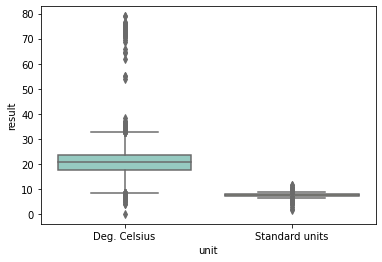

In [186]:
#Show boxplot of result categories
sns.boxplot(data=filter, x="unit",y="result",palette="Set3");

In [187]:
#extract rows with outlier celsius readings
filters.query("unit=='Deg. Celsius' and result>60")

,sample_date,site_name,site_type,param_type,parameter,result,unit
257355,1994-02-25 00:00:00,Lost Creek Residential Tributary @ Barton (LCR),Stream,Conventionals,WATER TEMPERATURE,62.00,Deg. Celsius
1090696,2013-05-13 15:10:00,Stillhouse Hollow ds of Stillhouse Hollow Spring,Stream,Conventionals,WATER TEMPERATURE,78.92,Deg. Celsius


In [188]:
#Rename the celsius outliers as fahrenheit readings
filters.at[257355,"unit"]="Deg. Fahrenheit"
filters.at[1090696,"unit"]="Deg. Fahrenheit"

In [189]:
#Convert Fahrenheit to Celsius
filters[filters["unit"]=="Deg. Fahrenheit"].result=(filters[filters["unit"]=="Deg. Fahrenheit"].result-32)*5/9

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [190]:
#rename fahrenheit readings as celsius
filters.unit.replace("Deg. Fahrenheit", "Deg. Celsius",inplace=True)

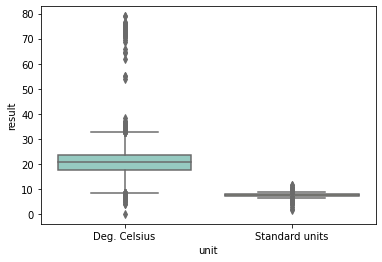

In [191]:
sns.boxplot(data=filters, x="unit",y="result",palette="Set3");

#### Test



In [192]:
filters[filters.unit=='Feet']

,sample_date,site_name,site_type,param_type,parameter,result,unit


In [193]:
filters[filters.unit=="MG/L"]

,sample_date,site_name,site_type,param_type,parameter,result,unit


In [194]:
filters[filters.result>1000000]

,sample_date,site_name,site_type,param_type,parameter,result,unit


In [195]:
filters.unit.value_counts()

Deg. Celsius      26099
Standard units    25623
Name: unit, dtype: int64

#### Define
- Drop param_type column
- Drop Duplicates



In [196]:
#Drop param_type
filters.drop("param_type",axis=1,inplace=True)

In [197]:
#Create a new copy
fils=filters.copy()

In [198]:
#we have to remove the result column to enable us catch hidden duplicates
fils.drop("result",axis=1,inplace=True)

In [199]:
#Show duplicated rows
fils[fils.duplicated()==True]

,sample_date,site_name,site_type,parameter,unit
639,2013-06-28 10:30:00,Barton Creek Downstream of Barton Spring Pool,Stream,WATER TEMPERATURE,Deg. Celsius
45256,2010-10-13 14:45:00,Barton Spring,Spring,PH,Standard units
45260,2010-10-13 14:45:00,Barton Spring,Spring,WATER TEMPERATURE,Deg. Celsius
49364,2010-06-10 11:50:00,Eliza Spring,Spring,WATER TEMPERATURE,Deg. Celsius
49693,2010-05-27 16:55:00,Barton Spring,Spring,WATER TEMPERATURE,Deg. Celsius
...,...,...,...,...,...
1121958,1994-11-06 09:50:00,Lady Bird Lake @ 1st St (CC),Lake,WATER TEMPERATURE,Deg. Celsius
1121962,1994-11-06 10:10:00,Lady Bird Lake @ Lamar (DC),Lake,PH,Standard units
1121963,1994-11-06 10:10:00,Lady Bird Lake @ Lamar (DC),Lake,PH,Standard units
1121974,2013-09-18 11:45:00,Lady Bird Lake @ 1st St (CC),Lake,PH,Standard units


In [200]:
#Store unique rows in a varible fil
fil=fils[fils.duplicated()==False]
fil

,sample_date,site_name,site_type,parameter,unit
175,2015-01-21 12:00:00,North Branch of Sycamore Creek @ Foster Ranch Rd,Stream,PH,Standard units
176,2015-01-21 12:00:00,North Branch of Sycamore Creek @ Foster Ranch Rd,Stream,WATER TEMPERATURE,Deg. Celsius
178,2015-01-21 11:30:00,Rimrock Spring 67,Spring,PH,Standard units
186,2015-01-21 09:45:00,Barton Scenic Bluff Spring,Spring,WATER TEMPERATURE,Deg. Celsius
218,2015-01-14 13:31:00,Barton Creek Downstream of Lost Creek Blvd,Stream,PH,Standard units
...,...,...,...,...,...
1122088,2008-03-26 11:50:00,Barton Spring,Spring,PH,Standard units
1122132,2013-11-08 12:00:00,Gaas Spring,Spring,PH,Standard units
1122144,2008-05-13 13:00:00,Stillhouse Hollow Spring,Spring,PH,Standard units
1122168,2008-09-18 11:15:00,Nature Center Well,Well,PH,Standard units


In [201]:
#Extract unique rows from the filters dataset
filters2=filters[filters.index.isin(fil.index)]

#### Test

In [202]:
filters2.duplicated().any()

False

### Tidiness 1 


#### Define
- Convert dataset from long to wide by having separate columns for pH and Water Temperature
- Rename PH and Water Temperature columns

#### Code

In [203]:
Cleaned=filters2.pivot(columns="parameter",values="result",index=['sample_date', 'site_name', 'site_type'])
Cleaned

parameter                                                                PH  \
sample_date         site_name                               site_type         
1986-05-01 13:35:00 Spillar Well                            Well       7.10   
                    USGS Well 300847097545801 (L. Bear Cr.) Well       7.10   
1986-05-02 00:00:00 USGS Well 300813097512101 (Marbridge)   Well       6.50   
1986-05-03 12:20:00 USGS Well 300847097545801 (L. Bear Cr.) Well       6.40   
1986-05-04 00:00:00 USGS Well 300813097512101 (Marbridge)   Well       6.85   
...                                                                     ...   
2017-01-31 11:15:00 Shoal Creek @ 5th Street                Stream     7.71   
2017-01-31 11:25:00 Shoal Downstream of 6th Street          Stream     7.61   
2017-02-08 11:00:00 Barton Spring Pool @ Downstream Dam     Stream     6.88   
2017-02-08 11:10:00 Barton Spring                           Spring     7.12   
2017-02-09 14:00:00 Mormon Taylor Spring                    Spring     6.93   

parameter                                                              WATER TEMPERATURE  
sample_date         site_name                               site_type                     
1986-05-01 13:35:00 Spillar Well                            Well                   21.00  
                    USGS Well 300847097545801 (L. Bear Cr.) Well                   21.00  
1986-05-02 00:00:00 USGS Well 300813097512101 (Marbridge)   Well                   21.00  
1986-05-03 12:20:00 USGS Well 300847097545801 (L. Bear Cr.) Well                   21.00  
1986-05-04 00:00:00 USGS Well 300813097512101 (Marbridge)   Well                   21.00  
...                                                                                  ...  
2017-01-31 11:15:00 Shoal Creek @ 5th Street                Stream                 13.47  
2017-01-31 11:25:00 Shoal Downstream of 6th Street          Stream                 13.96  
2017-02-08 11:00:00 Barton Spring Pool @ Downstream Dam     Stream                 20.45  
2017-02-08 11:10:00 Barton Spring                           Spring                 20.37  
2017-02-09 14:00:00 Mormon Taylor Spring                    Spring                 21.45  

[21950 rows x 2 columns]

In [204]:
Cleaned.rename(columns={"WATER TEMPERATURE":"Temperature","PH":"pH"},inplace=True)

#### Test

In [205]:
Cleaned.head()

parameter                                                                pH  \
sample_date         site_name                               site_type         
1986-05-01 13:35:00 Spillar Well                            Well       7.10   
                    USGS Well 300847097545801 (L. Bear Cr.) Well       7.10   
1986-05-02 00:00:00 USGS Well 300813097512101 (Marbridge)   Well       6.50   
1986-05-03 12:20:00 USGS Well 300847097545801 (L. Bear Cr.) Well       6.40   
1986-05-04 00:00:00 USGS Well 300813097512101 (Marbridge)   Well       6.85   

parameter                                                              Temperature  
sample_date         site_name                               site_type               
1986-05-01 13:35:00 Spillar Well                            Well              21.0  
                    USGS Well 300847097545801 (L. Bear Cr.) Well              21.0  
1986-05-02 00:00:00 USGS Well 300813097512101 (Marbridge)   Well              21.0  
1986-05-03 12:20:00 USGS Well 300847097545801 (L. Bear Cr.) Well              21.0  
1986-05-04 00:00:00 USGS Well 300813097512101 (Marbridge)   Well              21.0